In [1]:

import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data_path= "result_20220309_color.csv"
df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset
df_use=df.iloc[:,4:11]
df_use.head()
predictor = TabularPredictor.load("./dich_BD/")
df_train,df_test=train_test_split(df_use,test_size=0.15,random_state=1)
y_pred = predictor.predict(df_test)
y_true= df_test['subclass']
xstick=y_true.drop_duplicates()
predictor.evaluate_predictions(y_true, y_pred)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15552\779390111.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset


{'accuracy': 0.9932132012724117,
 'balanced_accuracy': 0.5006648936170213,
 'mcc': 0.0363422915371995,
 'f1': 0.9965950153927068,
 'precision': 0.9932131399394515,
 'recall': 1.0}

[[     1    751]
 [     0 109904]]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


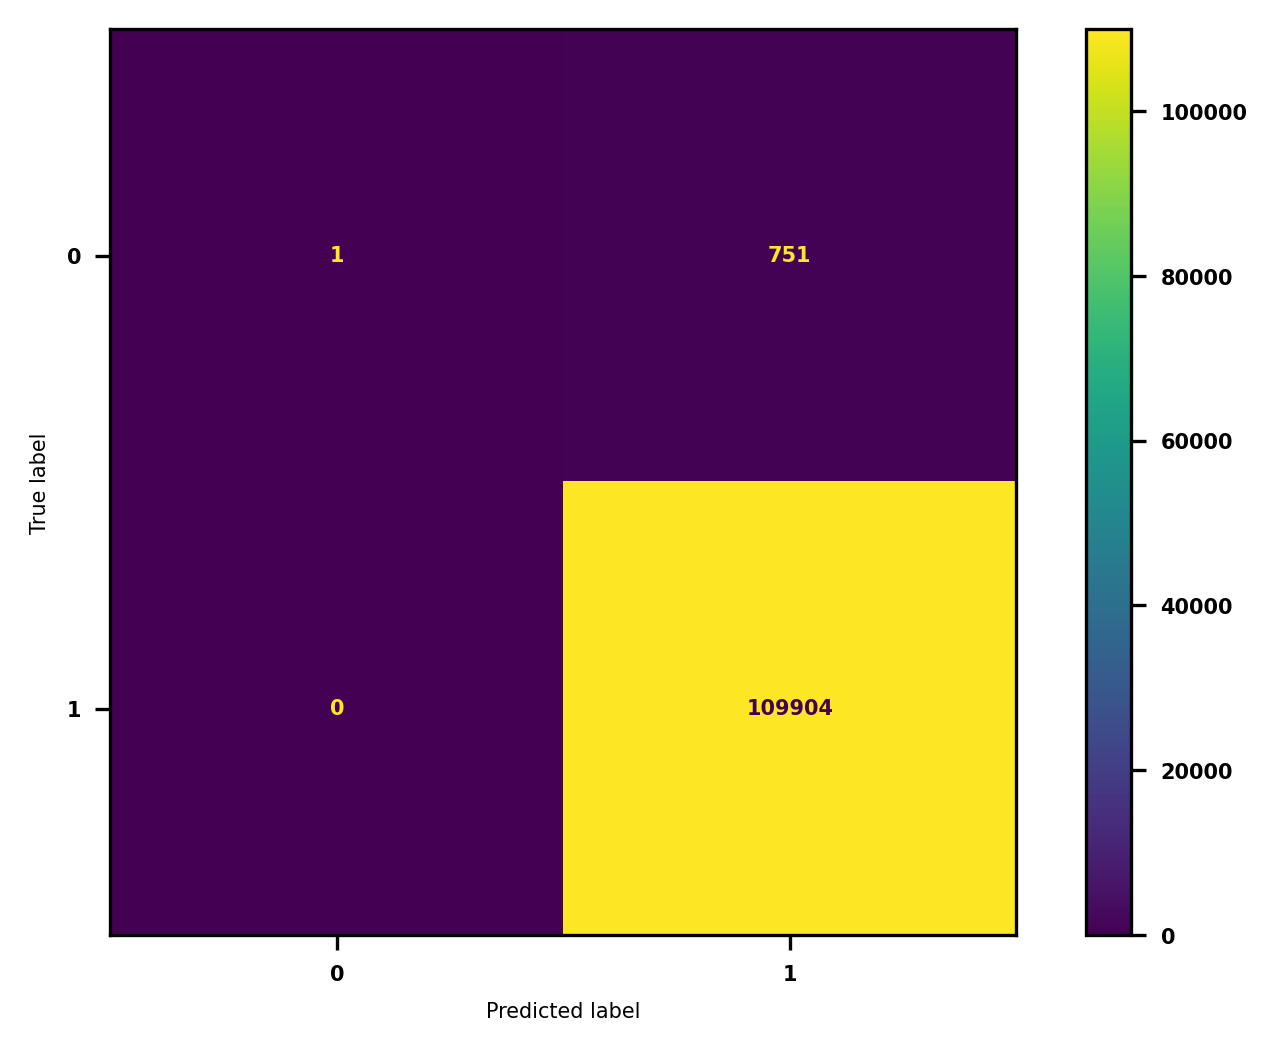

In [2]:
from sklearn.metrics import confusion_matrix
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 5}
plt.rc('font', **font)
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 300  # 分辨率
cm=confusion_matrix(y_true,y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

[[0.00132979 0.99867021]
 [0.         1.        ]]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

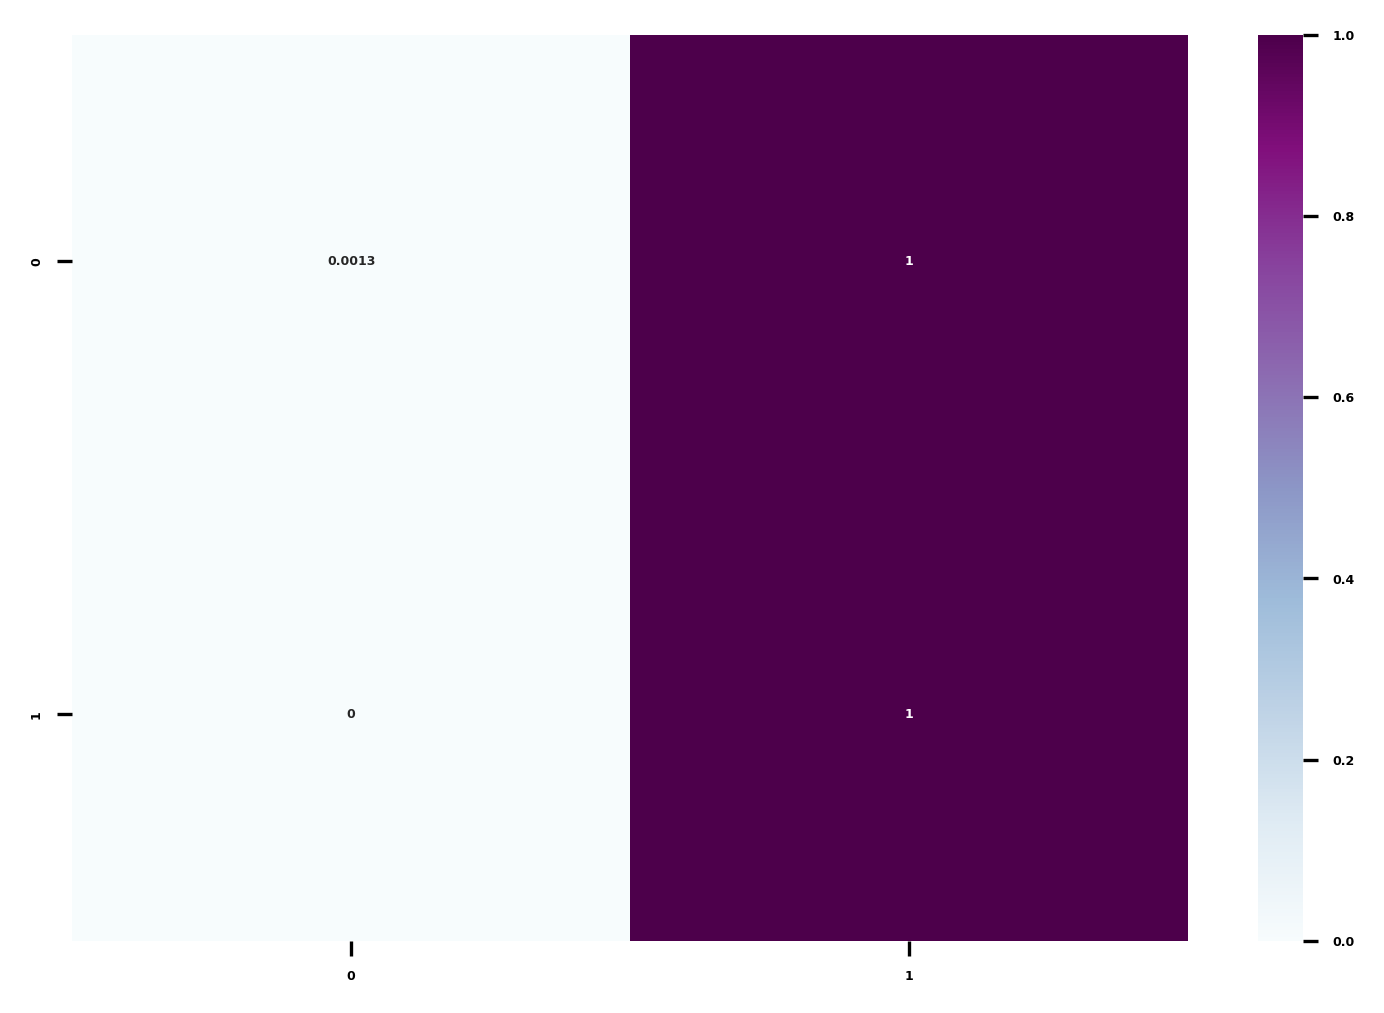

In [3]:
#混淆矩阵percentage
import seaborn as sn
cmpercent=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print(cmpercent)
tick=xstick.sort_values()
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 3}
plt.rc('font', **font)
sn.heatmap(cmpercent,xticklabels=tick,yticklabels=tick, annot=True, cmap="BuPu")

In [4]:
#输出预测概率
pred_probs = predictor.predict_proba(df_test)
pred_probs.head(5)

,0,1
631977,0.008620,0.991380
227824,0.006010,0.993990
588489,0.005055,0.994945
430730,0.005032,0.994968
649686,0.005123,0.994877


In [5]:
#可解释性
predictor.feature_importance(df_test)

,importance,stddev,p_value,n,p99_high,p99_low
W1mag-W2mag,0.0,0.0,0.5,3,0.0,0.0
W2mag-W3mag,0.0,0.0,0.5,3,0.0,0.0
Jmag-Hmag,0.0,0.0,0.5,3,0.0,0.0
Jmag-W1mag,0.0,0.0,0.5,3,0.0,0.0
Jmag-W2mag,0.0,0.0,0.5,3,0.0,0.0
Jmag-Kmag,0.0,0.0,0.5,3,0.0,0.0


In [6]:
#各个模型的性能
predictor.leaderboard(df_test, silent=True)

D:\conda\envs\automl\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.993213,0.993143,0.057002,0.036003,2.710989,0.057002,0.036003,2.710989,1,True,13
1,WeightedEnsemble_L2,0.993213,0.993143,0.103001,0.046003,4.945987,0.045998,0.010000,2.234998,2,True,14
2,LightGBMXT,0.993204,0.992984,0.030996,0.035002,2.047531,0.030996,0.035002,2.047531,1,True,3
3,CatBoost,0.993204,0.992984,0.037999,0.010999,1.990356,0.037999,0.010999,1.990356,1,True,7
4,LightGBM,0.993204,0.992984,0.047001,0.036005,1.120997,0.047001,0.036005,1.120997,1,True,4
5,XGBoost,0.993204,0.992984,0.094000,0.041005,0.893999,0.094000,0.041005,0.893999,1,True,11
6,RandomForestGini,0.993204,0.992984,1.445999,0.119000,101.505000,1.445999,0.119000,101.505000,1,True,5
7,ExtraTreesGini,0.993204,0.992984,1.642002,0.120996,36.531999,1.642002,0.120996,36.531999,1,True,8
8,ExtraTreesEntr,0.993204,0.992984,1.721000,0.152998,39.727994,1.721000,0.152998,39.727994,1,True,9
9,RandomForestEntr,0.993204,0.992984,1.843003,0.118997,95.200001,1.843003,0.118997,95.200001,1,True,6
